## 1. Le choix du degré du pôlynome en utilisant la validation croisée

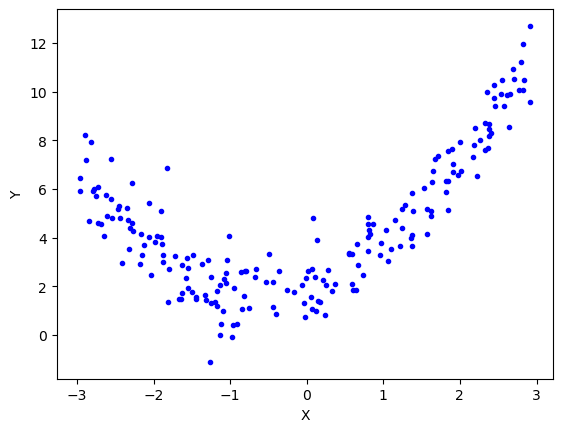

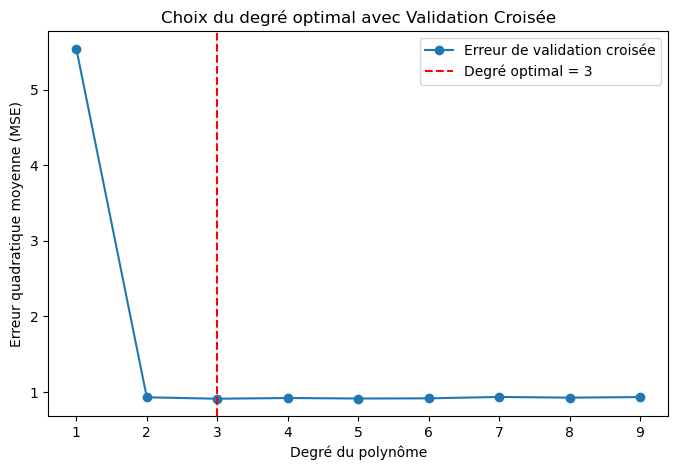

Degré optimal sélectionné : 3


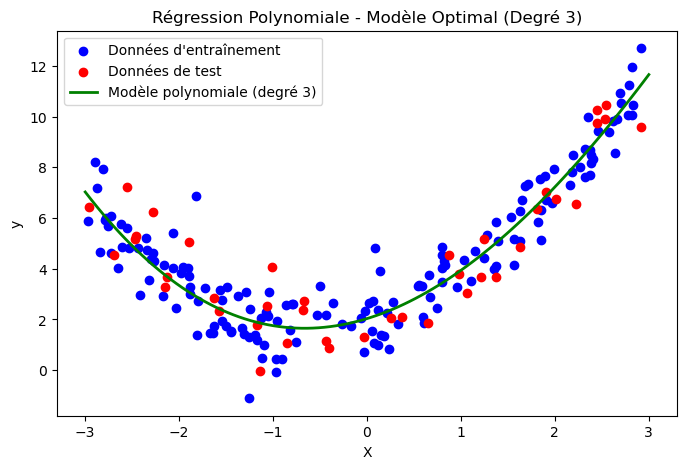

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Données synthétiques
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

X

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur les données d'entraînement uniquement
degrees = range(1, 10)
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    
    # Validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

# Trouver le degré optimal selon la validation croisée
optimal_degree = degrees[np.argmin(cv_errors)]

# Affichage des erreurs de validation croisée
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', label="Erreur de validation croisée")
plt.axvline(optimal_degree, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Choix du degré optimal avec Validation Croisée")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné : {optimal_degree}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par validation croisée
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree})")
plt.legend()
plt.show()


## 2. Le choix du degré du pôlynome en utilisant le BIC

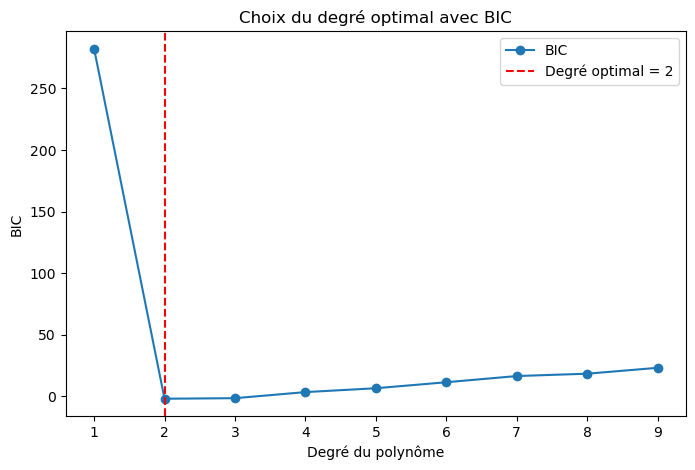

Degré optimal selon le BIC : 2
Erreur quadratique moyenne sur le test (MSE) : 1.0723968630048413


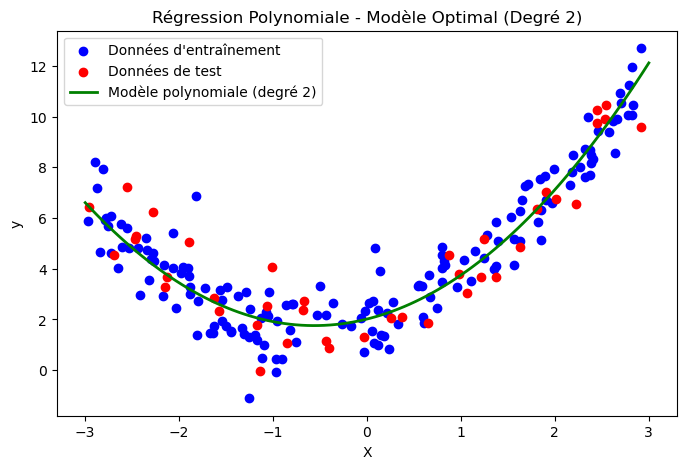

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Génération de données synthétiques
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur l'ensemble d'entraînement uniquement
degrees = range(1, 10)
bic_values = []

n_train = len(y_train)  # Nombre d'observations dans l'ensemble d'entraînement

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prédictions et erreur quadratique moyenne sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train, y_train_pred)

    # Calcul du BIC sur l'ensemble d'entraînement
    k = X_train_poly.shape[1]  # Nombre de paramètres (termes polynomiaux)
    bic = n_train * np.log(mse) + k * np.log(n_train)
    bic_values.append(bic)

# Trouver le degré optimal selon le BIC
optimal_degree_bic = degrees[np.argmin(bic_values)]

# Affichage des valeurs de BIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, bic_values, marker='o', label="BIC")
plt.axvline(optimal_degree_bic, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_bic}")
plt.xlabel("Degré du polynôme")
plt.ylabel("BIC")
plt.title("Choix du degré optimal avec BIC")
plt.legend()
plt.show()

print(f"Degré optimal selon le BIC : {optimal_degree_bic}")

# Entraînement du modèle final avec le degré optimal sur l'ensemble d'entraînement
poly = PolynomialFeatures(degree=optimal_degree_bic)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Évaluation sur l'ensemble de test
y_test_pred = model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Erreur quadratique moyenne sur le test (MSE) : {test_mse}")

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par BIC
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree_bic})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree_bic})")
plt.legend()
plt.show()


## 3. La séléction du degré optimal d'une régression polynomiale en minimisant l'erreur de test.

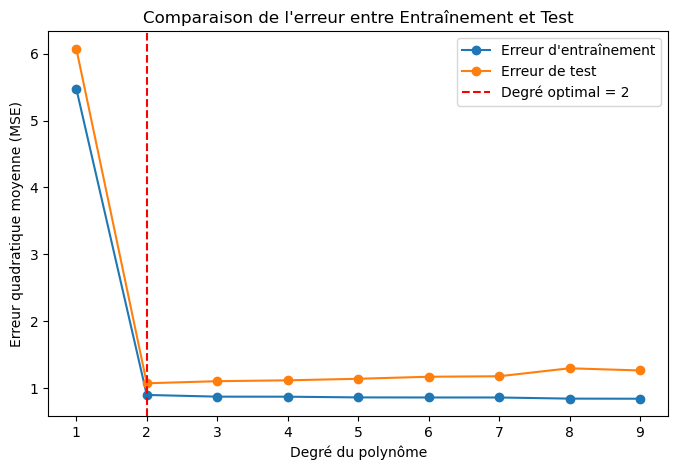

Degré optimal sélectionné selon l'erreur de test : 2


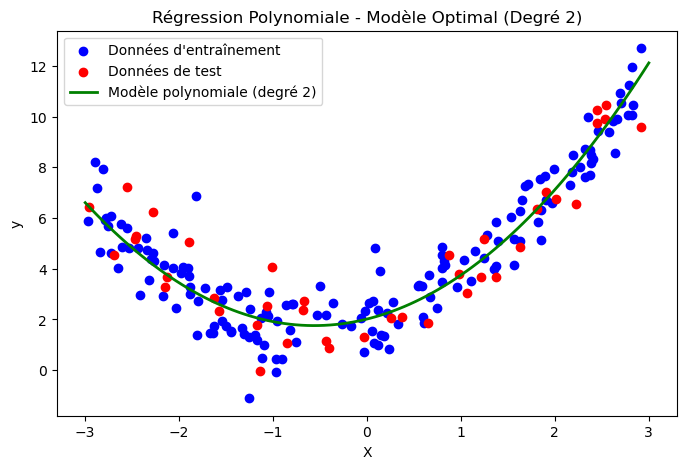

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Génération de données synthétiques
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés de polynôme
degrees = range(1, 10)
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calcul de l'erreur quadratique moyenne (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Trouver le degré optimal selon l'erreur de test minimale
optimal_degree_test = degrees[np.argmin(test_errors)]

# Affichage des erreurs en fonction du degré du polynôme
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Erreur d'entraînement", marker='o')
plt.plot(degrees, test_errors, label="Erreur de test", marker='o')
plt.axvline(optimal_degree_test, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_test}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Comparaison de l'erreur entre Entraînement et Test")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné selon l'erreur de test : {optimal_degree_test}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree_test)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par l'erreur de test
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree_test})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree_test})")
plt.legend()
plt.show()


In [47]:

# Verification des dimensions
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [48]:
# Création de la matrice X, inclut le Biais
X1 = np.hstack((X, np.ones(X.shape)))
X1 = np.hstack((X**2, X1)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X1.shape)
print(X1[:10])

(200, 3)
[[ 0.56664654 -0.75275929  1.        ]
 [ 7.3131619   2.70428584  1.        ]
 [ 1.93756281  1.39196365  1.        ]
 [ 0.35040587  0.59195091  1.        ]
 [ 4.25963433 -2.06388816  1.        ]
 [ 4.26023172 -2.06403288  1.        ]
 [ 7.03044338 -2.65149833  1.        ]
 [ 4.82705891  2.19705687  1.        ]
 [ 0.36807284  0.60669007  1.        ]
 [ 1.55859111  1.24843547  1.        ]]


In [49]:
# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(X1.shape[1], 1)
theta

array([[ 0.85765962],
       [-0.15993853],
       [-0.01901621]])

In [50]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [51]:
cost_function(X1, y, theta)

np.float64(3.811223004461064)

In [52]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [53]:
# Paramètres de la descente de gradient
n_iterations = 800
learning_rate = 0.1

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


In [54]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

predictions_manual = model(X_test, theta_final)
r2_manual = coef_determination(y_test, predictions_manual)
print(f'R² Score (Descente de gradient): {r2_manual}')

R² Score (Descente de gradient): 0.8591273918275102


In [55]:
theta_final

array([[0.8157192 ],
       [0.91803513],
       [2.01784436]])

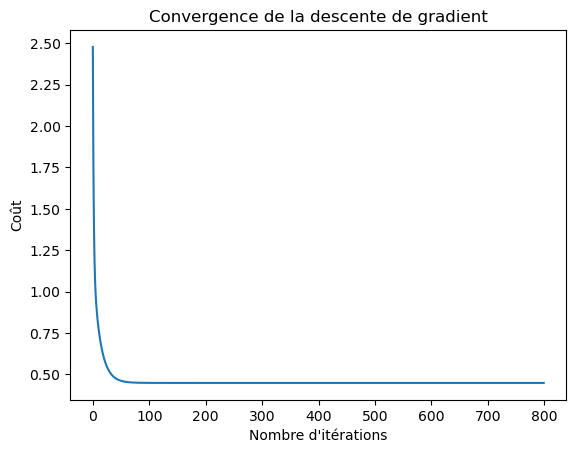

In [56]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()
